In [11]:
# ============================
# ✈️ Airlines Flights Analysis
# ============================
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Users\User\Downloads\airlines_flights_data.csv")

In [12]:
# ============================
# 🔹 Part 1: Exploratory Data Analysis (EDA)
# ============================

# Dataset overview
print("Rows, Columns:", df.shape)
print(df.info())
print(df.describe(include="all"))

Rows, Columns: (300153, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
                index  airline  flight source_city departure_time   stops  \
count   300153.000000   300153  300153      

In [13]:
# Missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [14]:
# Unique values for categorical columns
categorical_cols = ['airline','flight','source_city','departure_time','stops',
                    'arrival_time','destination_city','class']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

airline: 6 unique values
flight: 1561 unique values
source_city: 6 unique values
departure_time: 6 unique values
stops: 3 unique values
arrival_time: 6 unique values
destination_city: 6 unique values
class: 2 unique values


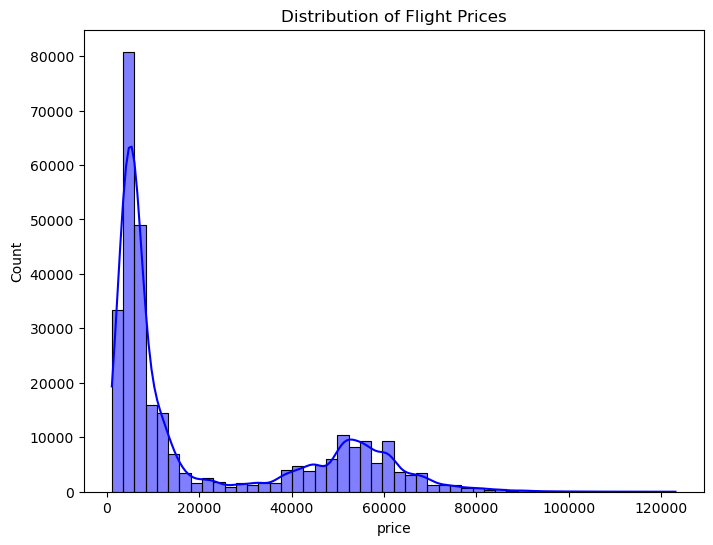

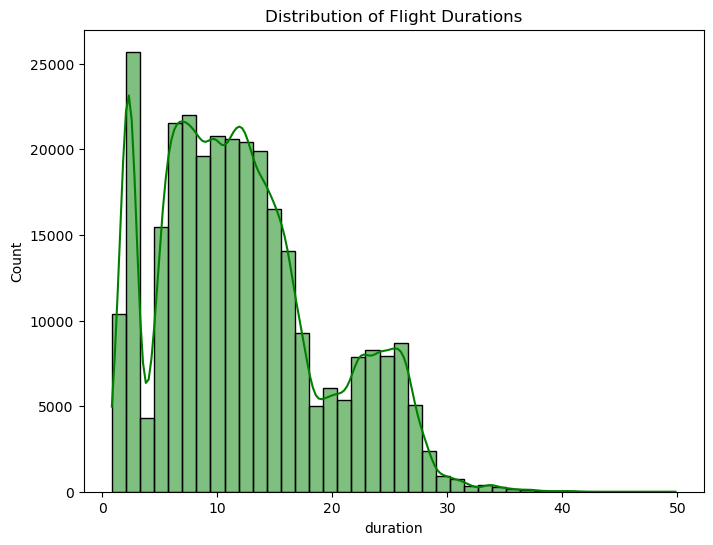

In [18]:
# Distribution of numeric features
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=50, kde=True, color="blue")
plt.title("Distribution of Flight Prices")
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df['duration'], bins=40, kde=True, color="green")
plt.title("Distribution of Flight Durations")
plt.show()

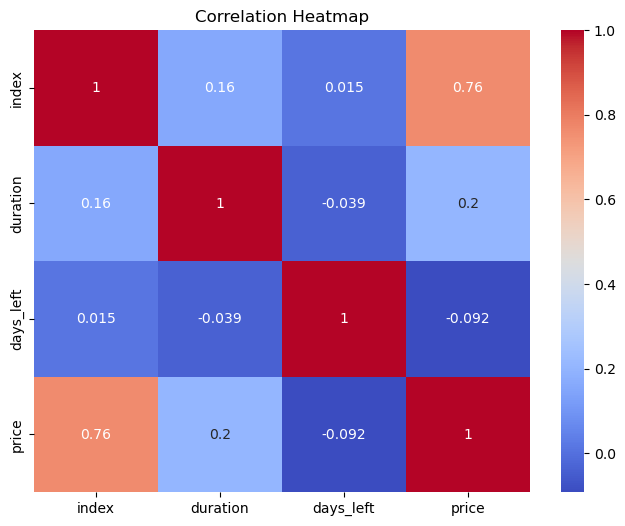

In [16]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


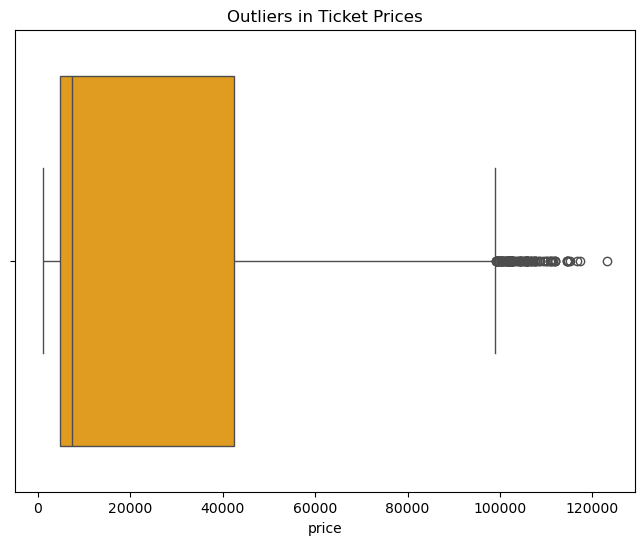

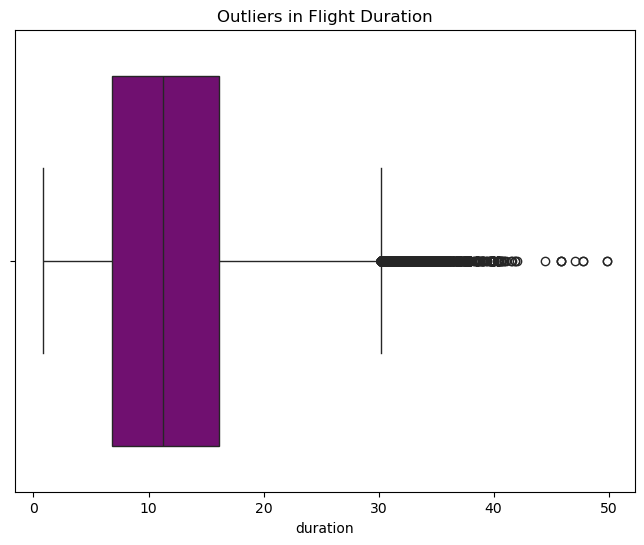

In [19]:
# Outlier detection
plt.figure(figsize=(8,6))
sns.boxplot(x=df['price'], color="orange")
plt.title("Outliers in Ticket Prices")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df['duration'], color="purple")
plt.title("Outliers in Flight Duration")
plt.show()

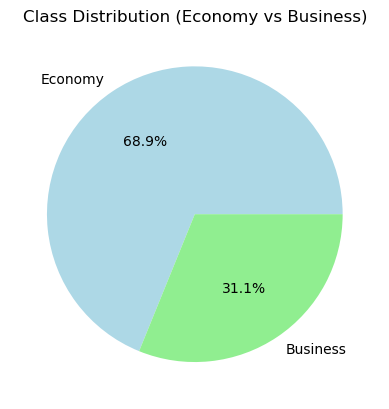

In [20]:
# Class balance
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','lightgreen'])
plt.title("Class Distribution (Economy vs Business)")
plt.ylabel("")
plt.show()

In [21]:
# ============================
# 🔹 Part 2: Business Questions
# ============================

# Q1. Airlines & Frequencies
print("\nQ1. Airlines Frequencies:")
print(df['airline'].value_counts())



Q1. Airlines Frequencies:
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


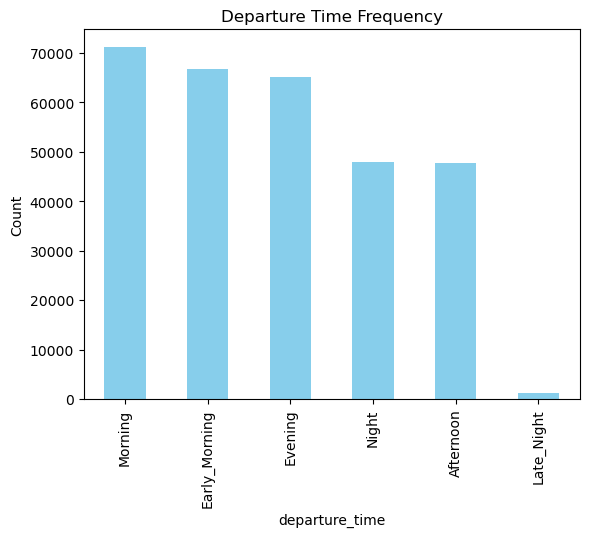

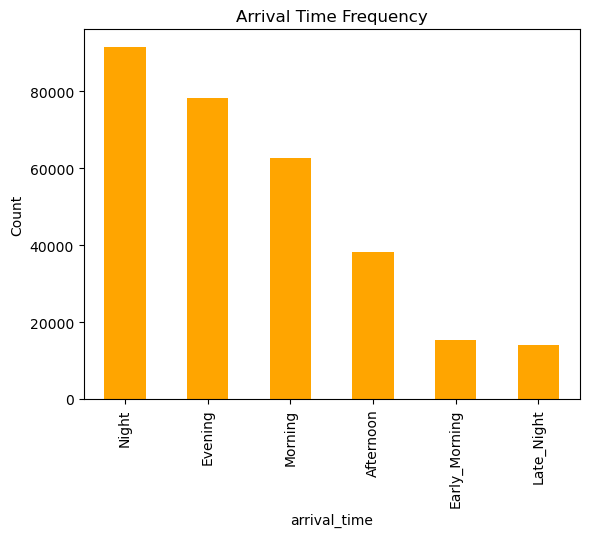

In [22]:
# Q2. Departure & Arrival Time
df['departure_time'].value_counts().plot(kind='bar', title="Departure Time Frequency", color="skyblue")
plt.ylabel("Count")
plt.show()

df['arrival_time'].value_counts().plot(kind='bar', title="Arrival Time Frequency", color="orange")
plt.ylabel("Count")
plt.show()

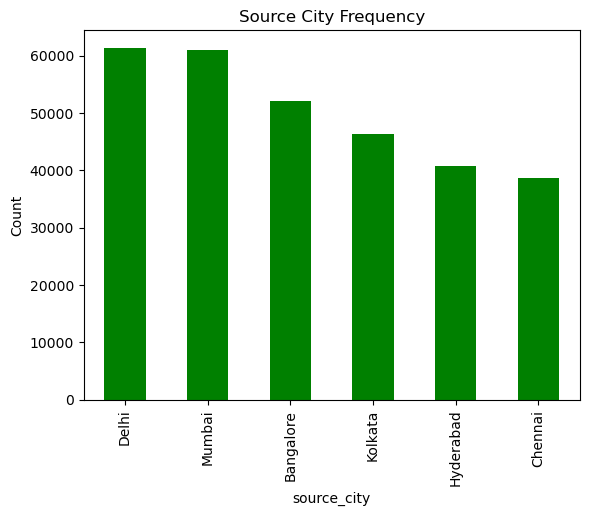

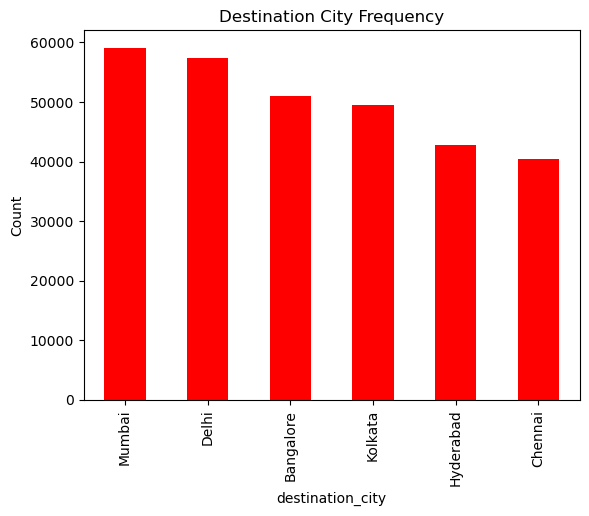

In [23]:
# Q3. Source & Destination City
df['source_city'].value_counts().plot(kind='bar', title="Source City Frequency", color="green")
plt.ylabel("Count")
plt.show()

df['destination_city'].value_counts().plot(kind='bar', title="Destination City Frequency", color="red")
plt.ylabel("Count")
plt.show()


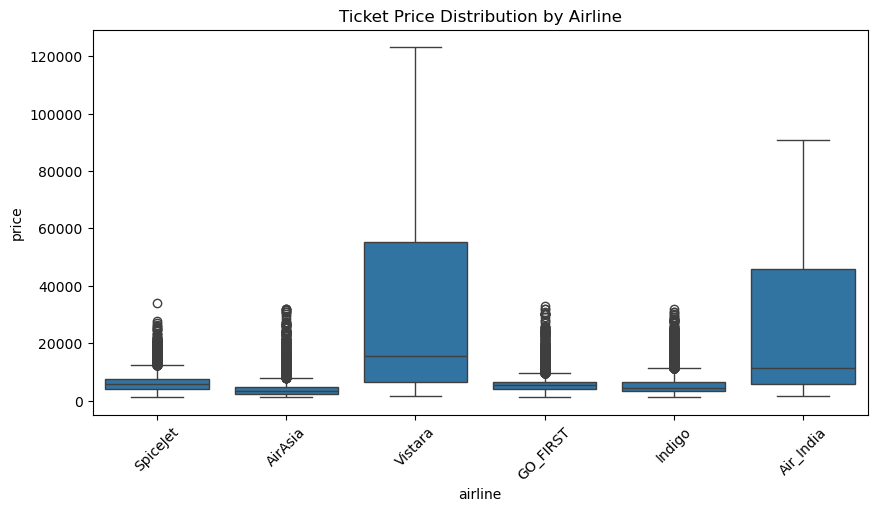

In [24]:
# Q4. Price vs Airlines
plt.figure(figsize=(10,5))
sns.boxplot(x="airline", y="price", data=df)
plt.xticks(rotation=45)
plt.title("Ticket Price Distribution by Airline")
plt.show()


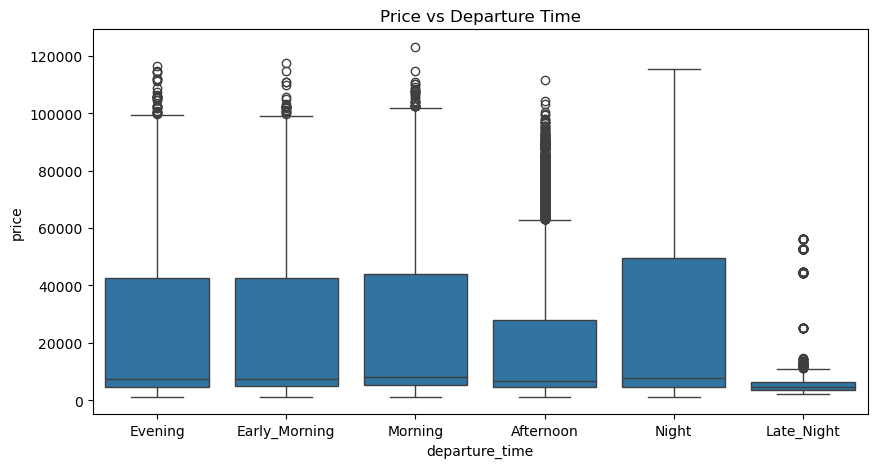

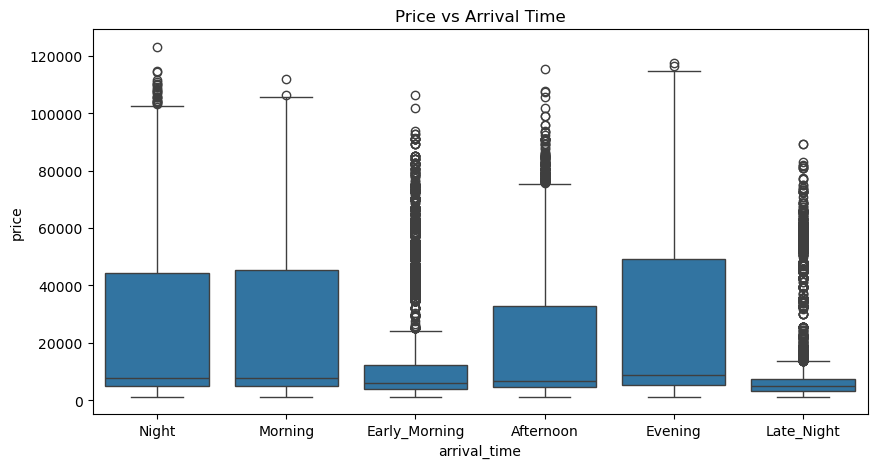

In [25]:
# Q5. Price vs Departure & Arrival Time
plt.figure(figsize=(10,5))
sns.boxplot(x="departure_time", y="price", data=df)
plt.title("Price vs Departure Time")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="arrival_time", y="price", data=df)
plt.title("Price vs Arrival Time")
plt.show()


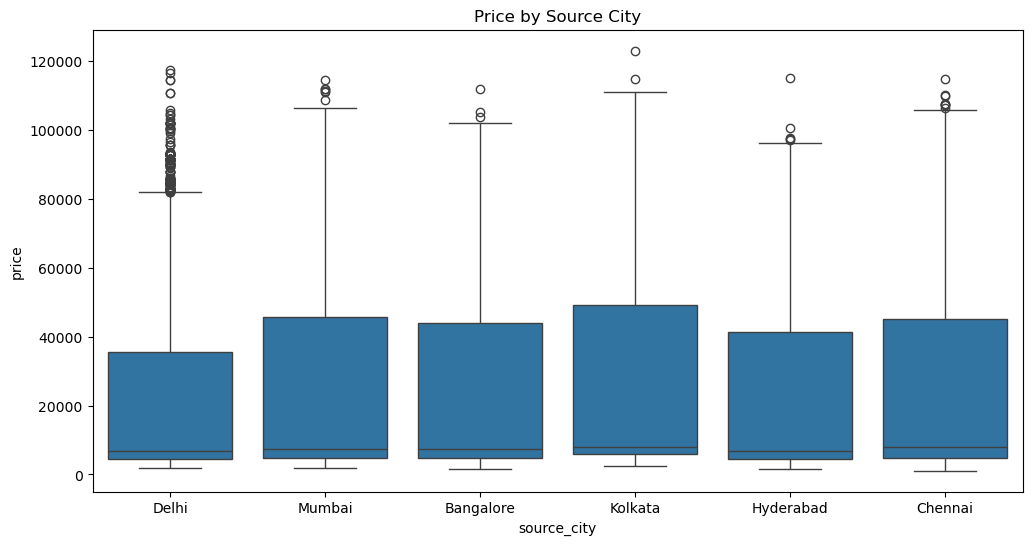

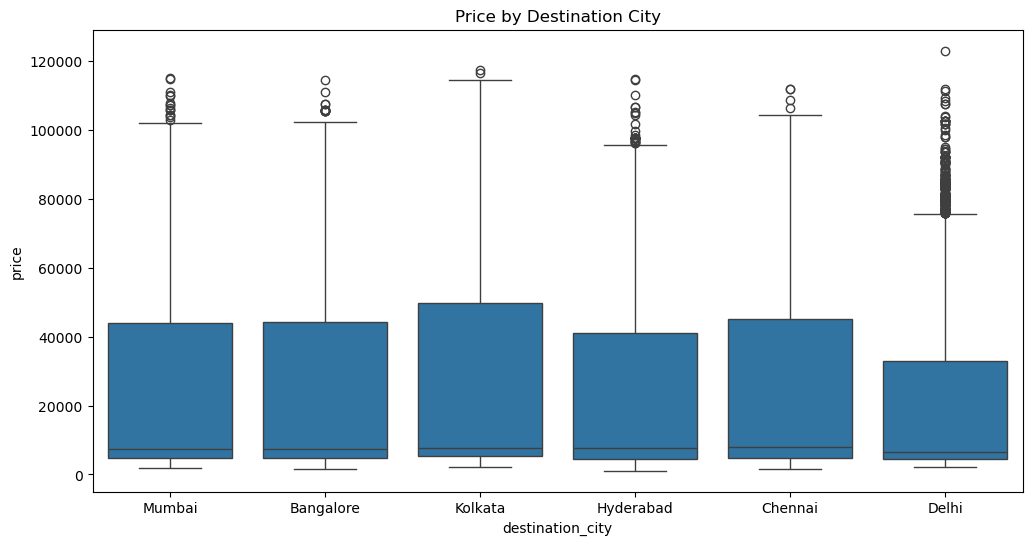

In [26]:
# Q6. Price vs Source & Destination
plt.figure(figsize=(12,6))
sns.boxplot(x="source_city", y="price", data=df)
plt.title("Price by Source City")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="destination_city", y="price", data=df)
plt.title("Price by Destination City")
plt.show()


In [27]:
# Q7. Last-minute ticket prices
last_minute = df[df['days_left'] <= 2]
avg_price_last_minute = last_minute['price'].mean()
avg_price_all = df['price'].mean()
print("\nQ7. Average Price (All Tickets):", avg_price_all)
print("Q7. Average Price (1–2 Days Before Departure):", avg_price_last_minute)



Q7. Average Price (All Tickets): 20889.660523133203
Q7. Average Price (1–2 Days Before Departure): 27421.169326390056


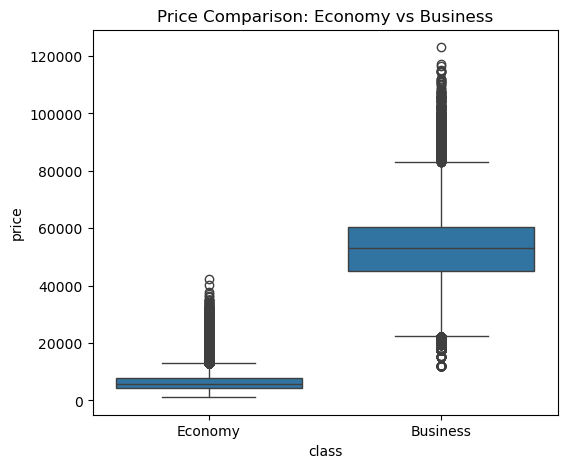

In [28]:
# Q8. Price: Economy vs Business
plt.figure(figsize=(6,5))
sns.boxplot(x="class", y="price", data=df)
plt.title("Price Comparison: Economy vs Business")
plt.show()

In [29]:
# Q9. Avg Price for Vistara (Delhi → Hyderabad, Business Class)
avg_price_vistara = df[(df['airline']=="Vistara") &
                       (df['source_city']=="Delhi") &
                       (df['destination_city']=="Hyderabad") &
                       (df['class']=="Business")]['price'].mean()

print("\nQ9. Average Price for Vistara (Delhi → Hyderabad, Business):", avg_price_vistara)



Q9. Average Price for Vistara (Delhi → Hyderabad, Business): 47939.840361445786
